<a href="https://colab.research.google.com/github/Jarmos-san/PumpItUp/blob/master/Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DrivenData Competition | Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

Goal - ***To predict the operating condition of a waterpoint for each record in the dataset.***

[Discussion Forums](https://community.drivendata.org/c/pump-it-up-data-mining-the-water-table)

---

Problem Description has 3 sections:

- Features
- Labels
- Submission Format

## Features:

- `TSHAmount` - **Total static head (amount water available to waterpoint)**
- `DateOfRecording` - **The date the row was entered**
- `Funder` - **Who funded the well**
- `GPSHeight` - **Altitude of the well**
- `Installer` - **Organization that installed the well**
- `Longitude` - **GPS coordinate**
- `Latitude` - **GPS coordinate**
- `WaterPointName` - **Name of the waterpoint if there is one**
- `PrivateNum` -
- `Basin` - **Geographic water basin**
- `SubVillage` - **Geographic location**
- `Region` - **Geographic location**
- `RegionCode` - **Geographic location (coded)**
- `DistrictCode` - **Geographic location (coded)**
- `LocalGovernmentArea` - **Geographic location**
- `Ward` - **Geographic location**
- `Population` - **Population around the well**
- `PublicMeeting` - **True/False**
- `RecordedBy` - **Group entering this row of data**
- `SchemeManager` - **Who operates the waterpoint**
- `SchemeName` - **Who operates the waterpoint**
- `Permit` - **If the waterpoint is permitted**
- `YearOfConstruction` - **Year the waterpoint was constructed**
- `ExtractionType` - **The kind of extraction the waterpoint uses**
- `ExtractionTypeGroup` - **The kind of extraction the waterpoint uses**
- `ExtractionTypeClass` - **The kind of extraction the waterpoint uses**
- `MangementType` - **How the waterpoint is managed**
- `ManagementGroup` - **How the waterpoint is managed**
- `OperationCosts` - **What the water costs**
- `PaymentType` - **What the water costs**
- `WaterQuality` - **The quality of the water**
- `Qualityroup` - **The quality of the water**
- `Quantity` - **The quantity of water**
- `QuantityGroup` - **The quantity of water**
- `Source` - **The source of the water**
- `SourceType` - **The source of the water**
- `SourceClass` - **The source of the water**
- `WaterPointType` - **The kind of waterpoint**
- `WaterPointTypeGroup` - **The kind of waterpoint**

## Labels:

- `functional` - **the waterpoint is operational and there are no repairs needed**
- `functional needs repair` - **the waterpoint is operational, but needs repairs**
- `non functional` - **the waterpoint is not operational**

## Submission Format:

id 	  | status_group |
------|--------------|
50785 |	functional   |
51630 |	functional   |
17168 |	functional   |
45559 |	functional   |
49871 |	functional   |

## Data Download:

File 	                                                                                                            | Description                                       |
------------------------------------------------------------------------------------------------------------------|---------------------------------------------------|
[Submission format](https://s3.amazonaws.com/drivendata/data/7/public/SubmissionFormat.csv)                       |	The format for submitting your predictions        |
[Test Set Values](https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv)     |	The independent variables that need predictions   |
[Training Set Labels](https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv) |	The dependent variable (status_group) for each of the rows in Training set values   |
[Training Set Values](https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv) | The independent variables for the training set    |

# Importing Necessary Libraries

- **Pandas** *v0.25.3*
- **Numpy** *v1.17.5*
- **Missingno** *v0.4.2*
- **Seaborn** *v0.10.0*

In [117]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import missingno

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the version for easier debugging at some point of time.
# print(f'Python v{python3.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'Numpy v{np.__version__}')
print(f'Missingno v{missingno.__version__}')
print(f'Seaborn v{sns.__version__}')

%matplotlib inline
sns.set(style='darkgrid')

Pandas v0.25.3
Numpy v1.17.5
Missingno v0.4.2
Seaborn v0.10.0


# Dataset Overview

In [0]:
PATH = 'https://s3.amazonaws.com/drivendata/data/7/public/'

# Load .csv file directly from the provided links
SubmissionFormat = pd.read_csv(f'{PATH}SubmissionFormat.csv')
TestSet = pd.read_csv(f'{PATH}702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv', parse_dates=['date_recorded'])
TrainLabels = pd.read_csv(f'{PATH}0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
TrainSet = pd.read_csv(f'{PATH}4910797b-ee55-40a7-8668-10efd5c1b960.csv', parse_dates=['date_recorded'])

# Make a copy of the original files for processing
TrainData = TrainSet.copy()
TestData = TestSet.copy()

In [119]:
# This is how the Submission File be like
SubmissionFormat.head(3)

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label


In [120]:
# Taking a look at the Training Labels file
TrainLabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [121]:
# Checking out the shape of the Train & Test set
print(f'Training set has {TrainData.shape[0]} rows & {TrainData.shape[1]} columns')
print(f'Training labels has {TrainLabels.shape[0]} rows & {TrainLabels.shape[1]} columns')
print(f'Test set has {TestData.shape[0]} rows & {TestData.shape[1]} columns')

Training set has 59400 rows & 40 columns
Training labels has 59400 rows & 2 columns
Test set has 14850 rows & 40 columns


In [122]:
# First 5 rows of the Tranining set
TrainData.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [123]:
# First 5 rows of the Testing set
TestData.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [124]:
# Checking the Training set column names
TrainData.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [125]:
# Checking the Testing set column names
print(TestData.columns)
type(TestData.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


pandas.core.indexes.base.Index

In [126]:
# Merging the Labels and Training set into a single Dataframe as well renaming the Column names properly.
TrainData = TrainData.merge(TrainLabels, on='id')
TrainingRenamedColumns = ['ID', 'TSHAmount', 'DateRecorded', 'Funder', 'GPSHeight', 'Installer', 'Longitutde',
              'Latitude', 'WaterPointName', 'PrivateNum', 'Basin', 'SubVillage', 'Region', 'RegionCode',
              'DistrictCode', 'LocalGovernmentArea', 'Ward', 'Population', 'PublicMeeting', 'RecordedBy',
              'SchemeManagement', 'SchemeName', 'Permit', 'ConstructionYear', 'ExtractionType', 
              'ExtractionTypeGroup', 'ExtractionTypeClass', 'Management', 'ManagementGroup', 'Payment', 
              'PaymentType', 'WaterQuality', 'QualityGroup', 'Quantity', 'QuantityGroup', 'Source', 
              'SourceType', 'SourceClass', 'WaterPointType', 'WaterPointTypeGroup', 'StatusGroup']
TrainData.set_axis(TrainingRenamedColumns, axis='columns', inplace=True)
TrainData.sample(1)

,ID,TSHAmount,DateRecorded,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup,StatusGroup
295,68037,0.0,2011-04-12,Socie,0,Commu,35.865939,-5.973474,Zahanati,0,Wami / Ruvu,Makulu,Dodoma,1,5,Dodoma Urban,Chihanga,0,True,GeoData Consultants Ltd,VWC,Nzas,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [127]:
# Renaming the columns for the Test set
TestRenamedColumns = ['ID', 'AmountTSH', 'DateRecorded', 'Funder', 'GPSHeight',
       'Installer', 'Longitude', 'Latitude', 'WaterPointName', 'PrivateNum',
       'Basin', 'SubVillage', 'Region', 'RegionCode', 'DistrictCode', 'LocalGovernmentArea', 
       'Ward', 'Population', 'PublicMeeting', 'RecordedBy', 'SchemeManagement', 
       'SchemeName', 'Permit', 'ConstructionYear', 'ExtractionType', 'ExtractionTypeGroup', 
       'ExtractionTypeClass', 'Management', 'ManagementGroup', 'Payment', 'PaymentType', 
       'WaterQuality', 'QualityGroup', 'Quantity', 'QuantityGroup', 'Source', 
       'SourceType', 'SourceClass', 'WaterPointType', 'WaterPointTypeGroup']
TestData.set_axis(TestRenamedColumns, axis=1, inplace=True)
TestData.sample(1)

,ID,AmountTSH,DateRecorded,Funder,GPSHeight,Installer,Longitude,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterpointType,WaterpointTypeGroup
6922,26600,2000.0,2013-02-18,Mission,1003,DWE,35.453742,-10.599722,Kwa Samwel,0,Lake Nyasa,Dodoma,Ruvuma,10,2,Songea Rural,Maposeni,0,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa peramiho,True,2005,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


In [128]:
# Check Training set datatypes
TrainData.dtypes

ID                              int64
TSHAmount                     float64
DateRecorded           datetime64[ns]
Funder                         object
GPSHeight                       int64
Installer                      object
Longitutde                    float64
Latitude                      float64
WaterPointName                 object
PrivateNum                      int64
Basin                          object
SubVillage                     object
Region                         object
RegionCode                      int64
DistrictCode                    int64
LocalGovernmentArea            object
Ward                           object
Population                      int64
PublicMeeting                  object
RecordedBy                     object
SchemeManagement               object
SchemeName                     object
Permit                         object
ConstructionYear                int64
ExtractionType                 object
ExtractionTypeGroup            object
ExtractionTy

In [129]:
# Checking Testing set datatype
TestData.dtypes

ID                              int64
AmountTSH                     float64
DateRecorded           datetime64[ns]
Funder                         object
GPSHeight                       int64
Installer                      object
Longitude                     float64
Latitude                      float64
WaterPointName                 object
PrivateNum                      int64
Basin                          object
SubVillage                     object
Region                         object
RegionCode                      int64
DistrictCode                    int64
LocalGovernmentArea            object
Ward                           object
Population                      int64
PublicMeeting                  object
RecordedBy                     object
SchemeManagement               object
SchemeName                     object
Permit                         object
ConstructionYear                int64
ExtractionType                 object
ExtractionTypeGroup            object
ExtractionTy

# Checking for Missing Values

In [0]:
def checkNullValues(data):
    """
    Function to check for missing values
    
    Arguments
    --------
    data: Accepts a dataset

    Returns
    -------
    A list of dicts with variable names as index and the respective values as 
    the percentage of missing value in that column. Besides a Missingno Matrix
    graph is also returned.
    """

    print('Number of Missing Values are:')

    nullValue = data.isnull().sum()     # Sum of all missing value in a column
    nRows = data.shape[0]               # Total number of rows in the dataset
    
    for index, value in nullValue.items():
        if value != 0:
            print(f'{index}: {value}({round(value/nRows*100)})%')

    print('\nVisualization of the Number of Missing Values')
    missingno.matrix(data, figsize=(18,5))

Number of Missing Values are:
Funder: 3635(6)%
Installer: 3655(6)%
SubVillage: 371(1)%
PublicMeeting: 3334(6)%
SchemeManagement: 3877(7)%
SchemeName: 28166(47)%
Permit: 3056(5)%

Visualization of the Number of Missing Values


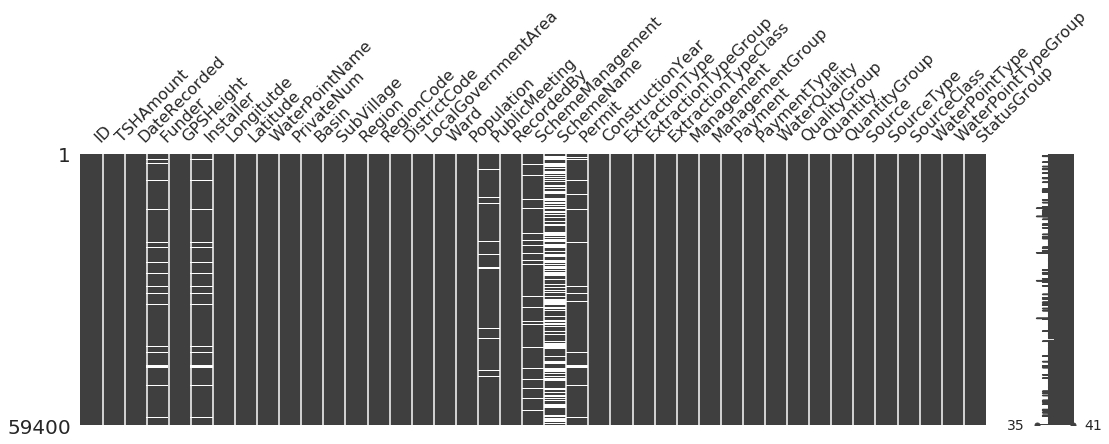

In [131]:
# Missing values from the Training set
checkNullValues(TrainData)

Number of Missing Values are:
Funder: 869(6)%
Installer: 877(6)%
SubVillage: 99(1)%
PublicMeeting: 821(6)%
SchemeManagement: 969(7)%
SchemeName: 7092(48)%
Permit: 737(5)%

Visualization of the Number of Missing Values


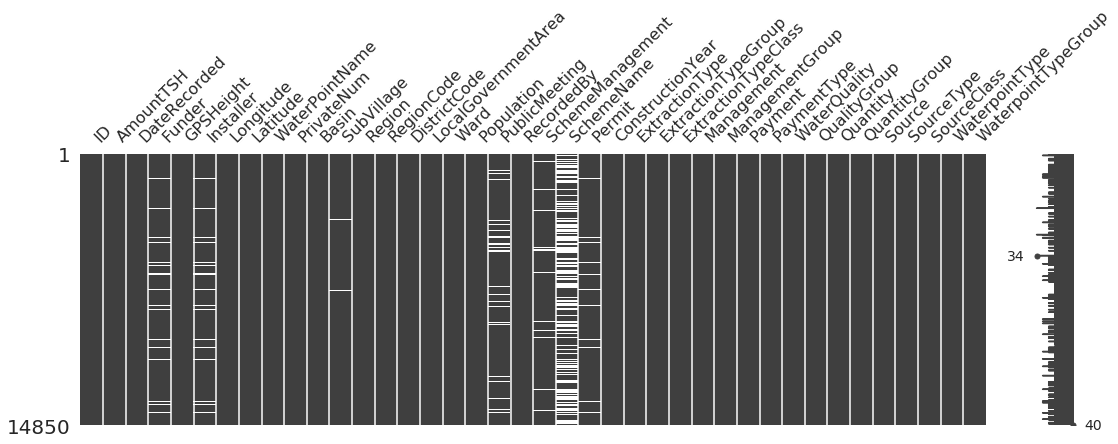

In [132]:
# Missing Values from the Testing set
checkNullValues(TestData)

# Checking For Some Categorical Variables

In [133]:
list(TrainData['Basin'].unique())

['Lake Nyasa',
 'Lake Victoria',
 'Pangani',
 'Ruvuma / Southern Coast',
 'Internal',
 'Lake Tanganyika',
 'Wami / Ruvu',
 'Rufiji',
 'Lake Rukwa']

In [134]:
list(TrainData['Region'].unique())

['Iringa',
 'Mara',
 'Manyara',
 'Mtwara',
 'Kagera',
 'Tanga',
 'Shinyanga',
 'Tabora',
 'Pwani',
 'Ruvuma',
 'Kilimanjaro',
 'Rukwa',
 'Mwanza',
 'Kigoma',
 'Lindi',
 'Dodoma',
 'Arusha',
 'Mbeya',
 'Singida',
 'Morogoro',
 'Dar es Salaam']

In [135]:
list(TrainData['RecordedBy'].unique())

['GeoData Consultants Ltd']

In [136]:
list(TrainData['SchemeManagement'].unique())

['VWC',
 'Other',
 nan,
 'Private operator',
 'WUG',
 'Water Board',
 'WUA',
 'Water authority',
 'Company',
 'Parastatal',
 'Trust',
 'SWC',
 'None']

In [137]:
list(TrainData['ExtractionType'].unique())

['gravity',
 'submersible',
 'swn 80',
 'nira/tanira',
 'india mark ii',
 'other',
 'ksb',
 'mono',
 'windmill',
 'afridev',
 'other - rope pump',
 'india mark iii',
 'other - swn 81',
 'other - play pump',
 'cemo',
 'climax',
 'walimi',
 'other - mkulima/shinyanga']

In [138]:
list(TrainData['ExtractionTypeGroup'].unique())

['gravity',
 'submersible',
 'swn 80',
 'nira/tanira',
 'india mark ii',
 'other',
 'mono',
 'wind-powered',
 'afridev',
 'rope pump',
 'india mark iii',
 'other handpump',
 'other motorpump']

In [139]:
list(TrainData['ExtractionTypeClass'].unique())

['gravity',
 'submersible',
 'handpump',
 'other',
 'motorpump',
 'wind-powered',
 'rope pump']

In [140]:
list(TrainData['Management'].unique())

['vwc',
 'wug',
 'other',
 'private operator',
 'water board',
 'wua',
 'company',
 'water authority',
 'parastatal',
 'unknown',
 'other - school',
 'trust']

In [141]:
list(TrainData['ManagementGroup'].unique())

['user-group', 'other', 'commercial', 'parastatal', 'unknown']

In [142]:
list(TrainData['Payment'].unique())

['pay annually',
 'never pay',
 'pay per bucket',
 'unknown',
 'pay when scheme fails',
 'other',
 'pay monthly']

In [143]:
list(TrainData['PaymentType'].unique())

['annually',
 'never pay',
 'per bucket',
 'unknown',
 'on failure',
 'other',
 'monthly']

In [144]:
list(TrainData['WaterQuality'].unique())

['soft',
 'salty',
 'milky',
 'unknown',
 'fluoride',
 'coloured',
 'salty abandoned',
 'fluoride abandoned']

In [145]:
list(TrainData['QualityGroup'].unique())

['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored']

In [146]:
list(TrainData['Quantity'].unique())

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']

In [147]:
list(TrainData['QuantityGroup'].unique())

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']

In [148]:
list(TrainData['Source'].unique())

['spring',
 'rainwater harvesting',
 'dam',
 'machine dbh',
 'other',
 'shallow well',
 'river',
 'hand dtw',
 'lake',
 'unknown']

In [149]:
list(TrainData['SourceType'].unique())

['spring',
 'rainwater harvesting',
 'dam',
 'borehole',
 'other',
 'shallow well',
 'river/lake']

In [150]:
list(TrainData['SourceClass'].unique())

['groundwater', 'surface', 'unknown']

In [151]:
list(TrainData['WaterPointType'].unique())

['communal standpipe',
 'communal standpipe multiple',
 'hand pump',
 'other',
 'improved spring',
 'cattle trough',
 'dam']

In [153]:
list(TrainData['WaterPointTypeGroup'].unique())

['communal standpipe',
 'hand pump',
 'other',
 'improved spring',
 'cattle trough',
 'dam']

# Some Observations About the Data Set

- `SchemeName` has the highest number of missing values with ~47%, from both the Training as well as the Test set.
- The `DateRecorded` is a `datetime` object so it should be possible to do some Time-Series analysis on it but not sure of the information gain from it, since its safe to assume that the column is a record of the date when the information from a particular was collected.
- A lot of the columns has string-type objects, not sure if there're any algorithms that would accept those objects for predictions.
- Some of those columns has possible categorical variables. One Examples is the `WaterPointType` which has 7 unique values.
- Some of the columns are possible duplicates to each other with some trivial difference in the values which could be informative at some point of time.
